# Importing The Data From Drive

In [1]:
!conda install -y gdown

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.13.3            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-5.1.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.2.1              |       hd590300_1         2.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be 

In [2]:
!gdown --id 18ji974kPnH-RXh8OiYgujOZaxozCIxrt

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=18ji974kPnH-RXh8OiYgujOZaxozCIxrt
From (redirected): https://drive.google.com/uc?id=18ji974kPnH-RXh8OiYgujOZaxozCIxrt&confirm=t&uuid=25541ffa-62cf-4c82-8215-9d42ae019d8a
To: /kaggle/working/copy-of-shai-level-2-training.zip
100%|████████████████████████████████████████| 551M/551M [00:05<00:00, 93.2MB/s]


# Un-Zipping The Data

In [3]:
import zipfile
import os

# Path to the zip file
zip_file_path = "/kaggle/working/copy-of-shai-level-2-training.zip"

# Directory to extract the contents of the zip file
extract_dir = "/kaggle/working/data"

# Create a directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted successfully.")

Dataset extracted successfully.


# Import Libraries 

In [104]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import f1_score
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
import random
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.metrics import classification_report

# Preprocssing the Images

In [5]:
def preprocess_image(image):

    image = image / 255.0
    return image

def apply_histogram_equalization(image):
    
    image_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])
    return cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)


In [24]:

data_dir = '/kaggle/working/data/train'
img_height, img_width = 224, 224
batch_size = 32

data = []
labels = []

for label, category in enumerate(['normal', 'virus', 'covid']):
    category_dir = os.path.join(data_dir, category)
    for img_name in os.listdir(category_dir):
        img_path = os.path.join(category_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        #img = apply_histogram_equalization(img)
        #img = preprocess_image(img)
        data.append(img)
        labels.append(label)

data = np.array(data)
labels = np.array(labels)

In [25]:
data[1].shape

(224, 224, 3)

In [26]:
data.shape

(1196, 224, 224, 3)

In [28]:
labels

array([0, 0, 0, ..., 2, 2, 2])

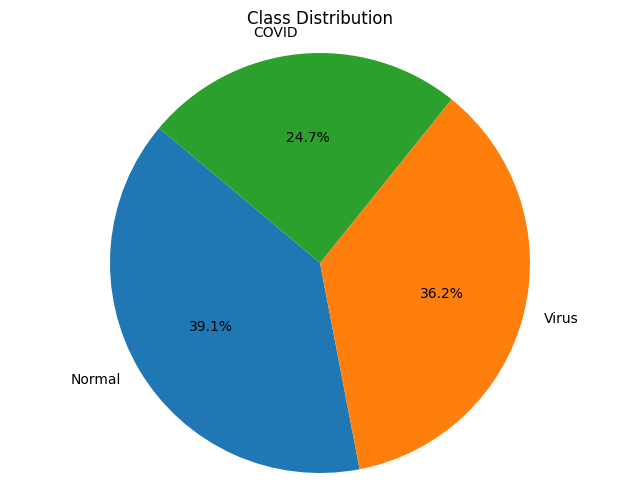

In [30]:
class_names = ['Normal', 'Virus', 'COVID']

# Count occurrences of each class label
class_counts = [np.sum(labels == i) for i in range(len(class_names))]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

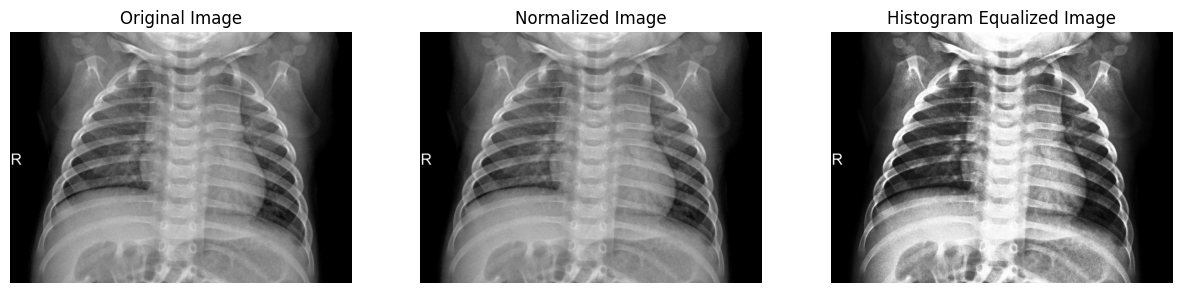

In [11]:
data_dir = '/kaggle/working/data/train/normal'

# Get list of image files in data directory
image_files = os.listdir(data_dir)

# Choose a random image file
random_image_file = random.choice(image_files)

# Load the image
image_path = os.path.join(data_dir, random_image_file)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot original image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

# Apply normalization
normalized_image = preprocess_image(image)
plt.subplot(1, 3, 2)
plt.title('Normalized Image')
plt.imshow(normalized_image)
plt.axis('off')

# Apply histogram equalization
equalized_image = apply_histogram_equalization(image)
plt.subplot(1, 3, 3)
plt.title('Histogram Equalized Image')
plt.imshow(equalized_image)
plt.axis('off')

plt.show()

# Shuffle The Data

In [42]:
def shuffle_data_and_labels(data, labels):
    assert len(data) == len(labels), "Data and labels must have the same length"
    combined = list(zip(data, labels))
    np.random.shuffle(combined)
    shuffled_data, shuffled_labels = zip(*combined)
    return np.array(shuffled_data), np.array(shuffled_labels)

In [43]:
data, labels = shuffle_data_and_labels(data, labels)

In [44]:
print(type(data))

<class 'numpy.ndarray'>


# Splitting The Data 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)


In [46]:
X_train.shape , X_val.shape ,X_test.shape 

((968, 224, 224, 3), (108, 224, 224, 3), (120, 224, 224, 3))

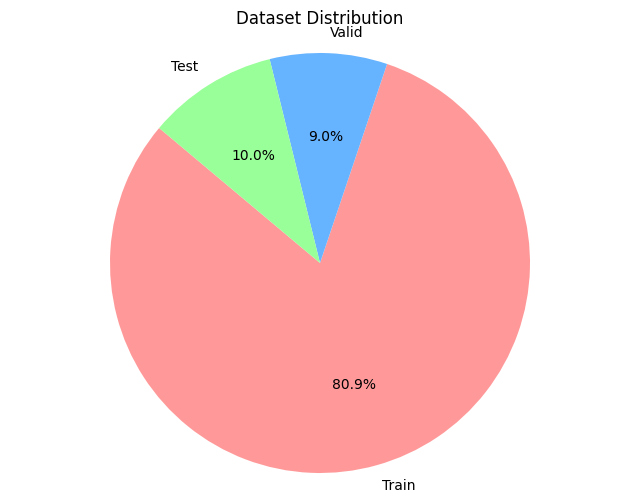

In [47]:
# Define dataset sizes
train_size = X_train.shape[0]
valid_size = X_val.shape[0]
test_size = X_test.shape[0]

# Calculate percentages
total_size = train_size + valid_size + test_size
train_percent = train_size / total_size * 100
valid_percent = valid_size / total_size * 100
test_percent = test_size / total_size * 100

# Labels and sizes for the pie chart
labels = ['Train', 'Valid', 'Test']
sizes = [train_percent, valid_percent, test_percent]

# Colors for each section
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Dataset Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [24]:
# import os
# import shutil
# import random
# from pathlib import Path

# # Define paths
# data_dir = Path("/kaggle/working/data/train")
# train_dir = data_dir / "Train"
# test_dir = data_dir / "Test"
# val_dir = data_dir / "Val"

# # Define classes
# classes = ["virus", "normal", "covid"]

# # Define the ratio for splitting
# train_ratio = 0.8
# test_ratio = 0.1
# val_ratio = 0.1

# # Create train, test, and validation directories if they don't exist
# for directory in [train_dir, test_dir, val_dir]:
#     if not directory.exists():
#         directory.mkdir(parents=True)
#         for class_name in classes:
#             (directory / class_name).mkdir()

# # Function to split data
# def split_data(source, train, test, val, split_ratios):
#     files = os.listdir(source)
#     files = [file for file in files if not file.startswith(".")]  # Exclude hidden files
#     random.shuffle(files)
#     split_train = int(len(files) * split_ratios[0])
#     split_test = int(len(files) * split_ratios[1])

#     train_files = files[:split_train]
#     test_files = files[split_train:split_train + split_test]
#     val_files = files[split_train + split_test:]

#     for file in train_files:
#         shutil.copy(source / file, train / file)
#     for file in test_files:
#         shutil.copy(source / file, test / file)
#     for file in val_files:
#         shutil.copy(source / file, val / file)

# # Split data into train, test, and validation sets for each class
# for class_name in classes:
#     source_dir = data_dir / class_name
#     train_class_dir = train_dir / class_name
#     test_class_dir = test_dir / class_name
#     val_class_dir = val_dir / class_name
#     split_data(source_dir, train_class_dir, test_class_dir, val_class_dir, [train_ratio, test_ratio, val_ratio])

# print("Data splitting completed successfully.")


# Define Constants

In [48]:
# train_dir = 'data/train/Train'
# val_dir = 'data/train/Val'
# test_dir = 'data/train/Test'

# # Define image dimensions
img_height, img_width = 224, 224
batch_size = 32
EPOCHS = 20

# Setting the GPU

In [49]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.15.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


# Data Augmentation 

In [53]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,         # Random zoom range
    vertical_flip=False,    # Don't flip inputs vertically
    fill_mode='nearest' 
)

val_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,         # Random zoom range
    vertical_flip=False,    # Don't flip inputs vertically
    fill_mode='nearest' )

test_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,        # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,         # Random zoom range
    vertical_flip=False,    # Don't flip inputs vertically
    fill_mode='nearest' )

train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=batch_size
)

validation_generator = val_datagen.flow(
    X_val, y_val,
    batch_size=batch_size
)

test_generator = test_datagen.flow(
    X_test, y_test,
    batch_size=batch_size
)


# # Load and prepare training data
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # Load and prepare validation data
# val_generator = val_datagen.flow_from_directory(
#     val_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # Load and prepare test data
# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# F1-Score Metric 

In [54]:

def f1_metric(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=1)
    f1 = f1_score(y_true, y_pred, average='macro')
    return f1

# GRAD CAM 

In [72]:
def get_grad_cam(model, img_path, class_index, layer_name):
    
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    preds = model.predict(x)
    pred_class = np.argmax(preds[0])
    pred_output = model.output[:, class_index]

    grads = tf.GradientTape().gradient(pred_output, model.get_layer(layer_name).output)[0]

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = model.get_layer(layer_name).output

    weighted_features = last_conv_layer_output * pooled_grads[..., tf.newaxis]
    cam = tf.reduce_sum(weighted_features, axis=-1)

    cam = np.maximum(cam, 0) 
    cam /= np.max(cam)  

    return cam[0]

# Building my Own Model 

## Model Building 

In [55]:

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    37,749,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,464,835 (150.55 MB)

 Trainable params: 39,464,835 (150.55 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [56]:
# Define learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(X_val) // batch_size,
    epochs=100,
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/30 ━━━━━━━━━━━━━━━━━━━━ 14:15 30s/step - accuracy: 0.4062 - loss: 1.0812

I0000 00:00:1711695597.290054    5365 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711695597.308013    5365 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 4/30 ━━━━━━━━━━━━━━━━━━━━ 1:45 4s/step - accuracy: 0.3565 - loss: 2.1964

W0000 00:00:1711695609.372162    5365 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 684ms/step - accuracy: 0.3421 - loss: 1.5182

W0000 00:00:1711695618.669992    5364 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 761ms/step - accuracy: 0.3428 - loss: 1.5092 - val_accuracy: 0.3021 - val_loss: 1.0687 - learning_rate: 0.0010
Epoch 2/100
 1/30 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.3750 - loss: 1.0742

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.3750 - loss: 1.0742 - val_accuracy: 0.3333 - val_loss: 1.0942 - learning_rate: 0.0010
Epoch 3/100


W0000 00:00:1711695623.458780    5365 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 369ms/step - accuracy: 0.3891 - loss: 1.0688 - val_accuracy: 0.3750 - val_loss: 0.9811 - learning_rate: 0.0010
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3438 - loss: 1.0394 - val_accuracy: 0.3333 - val_loss: 0.8626 - learning_rate: 0.0010
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 359ms/step - accuracy: 0.4484 - loss: 0.9749 - val_accuracy: 0.5312 - val_loss: 0.9708 - learning_rate: 0.0010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - loss: 0.9599 - val_accuracy: 0.5000 - val_loss: 0.9957 - learning_rate: 0.0010
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 360ms/step - accuracy: 0.4917 - loss: 0.9814 - val_accuracy: 0.6042 - val_loss: 0.7945 - learning_rate: 0.0010
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.4375 - loss: 0.8899 - val_accuracy: 0.2500 - val_loss: 0.9750 - learning_rate: 0.0010
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 355ms/step - accuracy: 0.5488 - loss: 0.8646 - val_a

## Model Evaluation 

In [76]:
# Evaluate the model on the valid set
valid_loss, valid_accuracy = model.evaluate(validation_generator)
print("Valid Loss:", valid_loss)
print("Valid Accuracy:", valid_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.7479 - loss: 0.5433
Valid Loss: 0.555174708366394
Valid Accuracy: 0.75


In [77]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 0.7694 - loss: 0.5999
Test Loss: 0.590697169303894
Test Accuracy: 0.7749999761581421


## Learning & Validation Curve

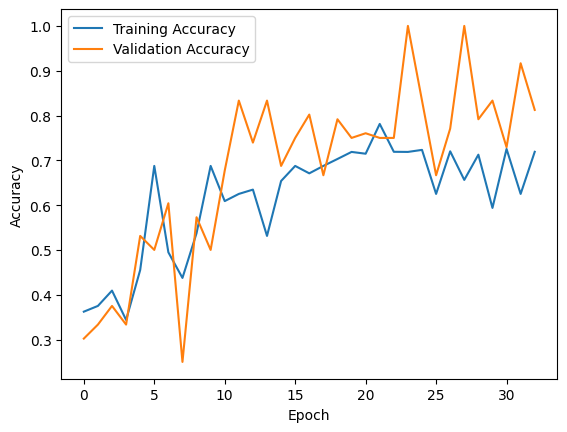

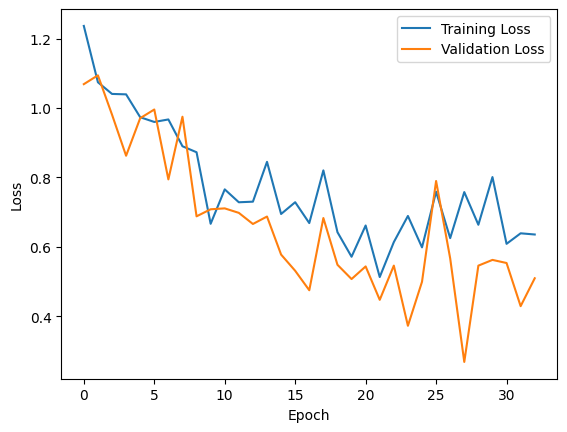

In [63]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## GRDA CAM 

In [78]:
data_dir = '/kaggle/working/data/train/covid'

image_files = os.listdir(data_dir)
random_image_file = random.choice(image_files)
image_path = os.path.join(data_dir, random_image_file)

In [ ]:
label_index = 2  # Change this to the desired label index
layer_name = 'conv5_block3_out'  # Change this to the name of the last convolutional layer

# Generate Grad-CAM
heatmap = get_grad_cam(model, image_path, label_index, layer_name)

# Load the original image
original_img = load_img(img_path, target_size=(224, 224))

# Plot Grad-CAM heatmap on top of the original image
plt.imshow(original_img)
plt.imshow(heatmap, alpha=0.6, cmap='jet')
plt.axis('off')
plt.show()

## Classification Report 

In [111]:
predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = []
for i in range(len(test_generator)):
    _, labels = test_generator[i]
    true_classes.extend(labels)

report = classification_report(true_classes, predicted_classes, labels=[0, 1, 2], target_names=['normal', 'virus', 'covid'])

print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step
              precision    recall  f1-score   support

      normal       0.39      0.33      0.36        36
       virus       0.45      0.45      0.45        53
       covid       0.28      0.32      0.30        31

    accuracy                           0.38       120
   macro avg       0.37      0.37      0.37       120
weighted avg       0.39      0.38      0.38       120



# Transfer Learning on Pretrained Model (VGG16)

## Importing VGG16

In [80]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



## Training VGG16

In [81]:
# Define learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history = vgg_model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(X_val) // batch_size,
    epochs=50,
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/50
 1/30 ━━━━━━━━━━━━━━━━━━━━ 16:03 33s/step - accuracy: 0.3438 - loss: 1.1052

W0000 00:00:1711697904.741057    5367 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.4614 - loss: 1.0595

W0000 00:00:1711697924.318443    5367 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 695ms/step - accuracy: 0.4653 - loss: 1.0543 - val_accuracy: 0.8125 - val_loss: 0.6214 - learning_rate: 0.0010
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 470ms/step - accuracy: 0.9062 - loss: 0.6580 - val_accuracy: 0.8333 - val_loss: 0.5946 - learning_rate: 0.0010
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 358ms/step - accuracy: 0.8238 - loss: 0.5891 - val_accuracy: 0.8854 - val_loss: 0.3897 - learning_rate: 0.0010
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 0.5706 - val_accuracy: 0.7500 - val_loss: 0.6523 - learning_rate: 0.0010
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 356ms/step - accuracy: 0.8585 - loss: 0.4413 - val_accuracy: 0.8854 - val_loss: 0.3965 - learning_rate: 0.0010
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.3858 - val_accuracy: 0.9167 - val_loss: 0.3685 - learning_rate: 0.0010
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 361ms/step - accuracy: 0.8657 - loss: 0.3933 - val_accura

## VGG16 Evaluation 

In [94]:
# Evaluate the model on the valid set
valid_loss, valid_accuracy = vgg_model.evaluate(validation_generator)
print("Valid Loss:", valid_loss)
print("Valid Accuracy:", valid_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.9340 - loss: 0.2422
Valid Loss: 0.2315393090248108
Valid Accuracy: 0.9444444179534912


In [82]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - accuracy: 0.9306 - loss: 0.2321 
Test Loss: 0.22775527834892273
Test Accuracy: 0.9333333373069763


W0000 00:00:1711698100.867964    5365 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


## VGG16 Learning & Validation Curve 

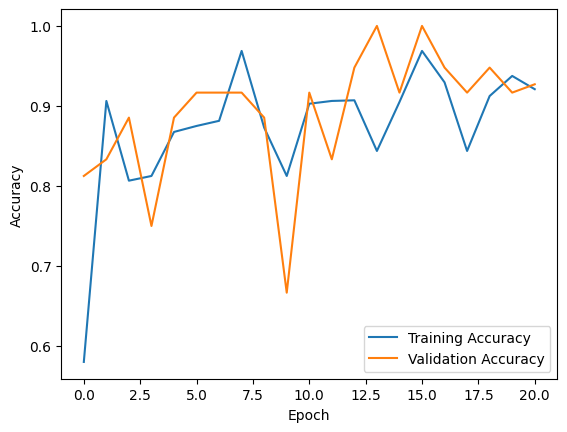

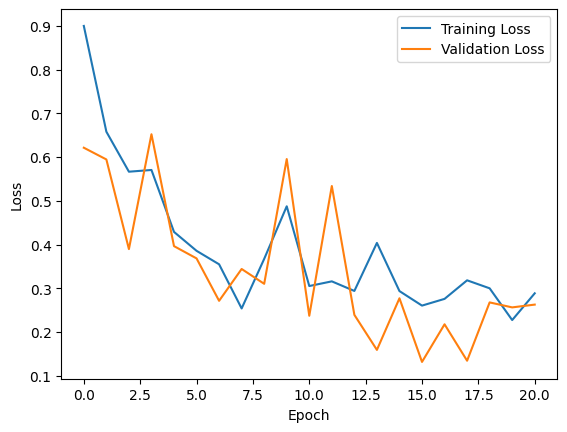

In [83]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [87]:
data_dir = '/kaggle/working/data/train/covid'

image_files = os.listdir(data_dir)
random_image_file = random.choice(image_files)
image_path = os.path.join(data_dir, random_image_file)

In [89]:
layer_name = vgg_model.layers[-1].name
print("Last Layer Name:", layer_name)

Last Layer Name: dense_7


In [ ]:
label_index = 2  # Change this to the desired label index

# Generate Grad-CAM
heatmap = get_grad_cam(vgg_model, image_path, label_index, layer_name)

# Load the original image
original_img = load_img(img_path, target_size=(224, 224))

# Plot Grad-CAM heatmap on top of the original image
plt.imshow(original_img)
plt.imshow(heatmap, alpha=0.6, cmap='jet')
plt.axis('off')
plt.show()

## Classification Report 

In [109]:
predictions = vgg_model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = []
for i in range(len(test_generator)):
    _, labels = test_generator[i]
    true_classes.extend(labels)

report = classification_report(true_classes, predicted_classes, labels=[0, 1, 2], target_names=['normal', 'virus', 'covid'])

print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step
              precision    recall  f1-score   support

      normal       0.28      0.31      0.29        36
       virus       0.45      0.40      0.42        53
       covid       0.26      0.29      0.28        31

    accuracy                           0.34       120
   macro avg       0.33      0.33      0.33       120
weighted avg       0.35      0.34      0.35       120



# Transfer Learning on Pre-trained Models (RESNET50)

## Importing RESNET50

In [91]:

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

resnet_model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## RESNET50 Training 

In [92]:
# Define learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history = resnet_model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(X_val) // batch_size,
    epochs=50,
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/50
 2/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.2969 - loss: 1.5298 

W0000 00:00:1711698338.339132    5364 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.3688 - loss: 1.4675

W0000 00:00:1711698357.231055    5367 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 679ms/step - accuracy: 0.3695 - loss: 1.4611 - val_accuracy: 0.4479 - val_loss: 1.0513 - learning_rate: 0.0010
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.4375 - loss: 1.0370 - val_accuracy: 0.8333 - val_loss: 0.9945 - learning_rate: 0.0010
Epoch 3/50


W0000 00:00:1711698363.078504    5365 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 357ms/step - accuracy: 0.4930 - loss: 1.0526 - val_accuracy: 0.4271 - val_loss: 0.9547 - learning_rate: 0.0010
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 0.8753 - val_accuracy: 0.5833 - val_loss: 0.9453 - learning_rate: 0.0010
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 352ms/step - accuracy: 0.5116 - loss: 0.9558 - val_accuracy: 0.5417 - val_loss: 0.9052 - learning_rate: 0.0010
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3750 - loss: 1.1130 - val_accuracy: 0.7500 - val_loss: 0.8517 - learning_rate: 0.0010
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 349ms/step - accuracy: 0.5335 - loss: 0.9630 - val_accuracy: 0.5833 - val_loss: 0.9061 - learning_rate: 0.0010
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5938 - loss: 0.8373 - val_accuracy: 0.5833 - val_loss: 0.7958 - learning_rate: 0.0010
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 354ms/step - accuracy: 0.5589 - loss: 0.9069 - val_accuracy:

## RESNET50 Evaluation

In [96]:
# Evaluate the model on the valid set
valid_loss, valid_accuracy = resnet_model.evaluate(validation_generator)
print("Valid Loss:", valid_loss)
print("Valid Accuracy:", valid_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.7384 - loss: 0.7675
Valid Loss: 0.7773827910423279
Valid Accuracy: 0.7314814925193787


In [93]:
# Evaluate the model on test data
test_loss, test_accuracy = resnet_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6458 - loss: 0.8390  
Test Loss: 0.8341606855392456
Test Accuracy: 0.625


W0000 00:00:1711698466.062942    5366 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


## RESNET50 Learning & Validation Curve 

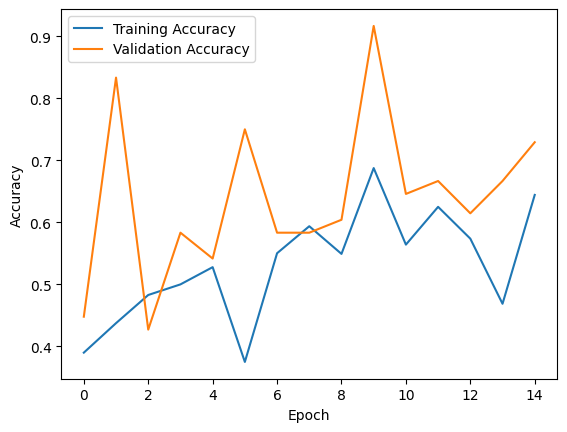

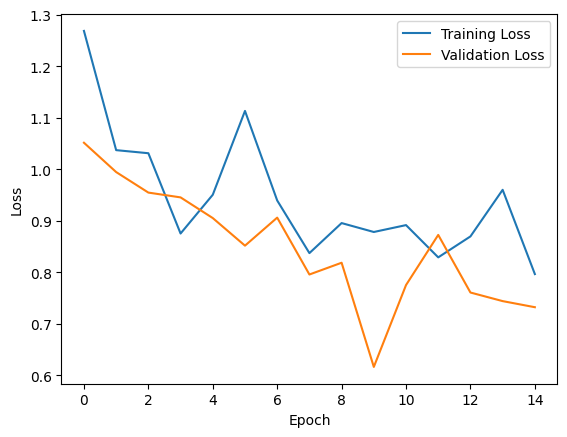

In [97]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Classification Report 

In [110]:
predictions = resnet_model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = []
for i in range(len(test_generator)):
    _, labels = test_generator[i]
    true_classes.extend(labels)

report = classification_report(true_classes, predicted_classes, labels=[0, 1, 2], target_names=['normal', 'virus', 'covid'])

print(report)

2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

W0000 00:00:1711699649.379393    5364 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step  


W0000 00:00:1711699653.808736    5366 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

      normal       0.24      0.44      0.31        36
       virus       0.42      0.09      0.15        53
       covid       0.25      0.32      0.28        31

    accuracy                           0.26       120
   macro avg       0.30      0.29      0.25       120
weighted avg       0.32      0.26      0.23       120



# Testing The Model

In [42]:
import os
import numpy as np
import cv2
import pandas as pd

def preprocess_image(img_path):
    # Load image
    img = cv2.imread(img_path)
    # Resize image
    img = cv2.resize(img, (img_height, img_width))
    # Apply histogram equalization
#     img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
#     img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
#     img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    # Normalize pixel values
    img = img / 255.0
    return img

testing_images = []
testing_image_names = []

for img_name in os.listdir(testing_data_folder):
    img_path = os.path.join(testing_data_folder, img_name)
    testing_images.append(preprocess_image(img_path))
    testing_image_names.append(img_name)

testing_images = np.array(testing_images)

predicted_labels = vgg_model.predict(testing_images)

predicted_classes = [np.argmax(label) for label in predicted_labels]

class_names = {0: 'normal', 1: 'virus', 2: 'covid'}
predicted_labels = [class_names[label] for label in predicted_classes]

df_results = pd.DataFrame({'Image': testing_image_names, 'Label': predicted_labels})

print(df_results)

 2/17 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step 

W0000 00:00:1711622727.480173    5355 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 345ms/step

              Image   Label

0     337385832.jpg   covid

1    643791781.jpeg  normal

2      6963610.jpeg  normal

3    491589162.jpeg   virus

4     20328626.jpeg  normal

..              ...     ...

508  358657359.jpeg   virus

509   29162480.jpeg  normal

510   175254813.jpg   covid

511  259719616.jpeg  normal

512  421339146.jpeg   virus



[513 rows x 2 columns]


In [ ]:
# import os
# import pandas as pd
# from PIL import Image

# # Define the path to the testing data folder
# testing_data_folder = '/kaggle/working/data/test'

# # Function to preprocess images
# def preprocess_image(img_path):
#     img = Image.open(img_path)
#     img = img.resize((img_height, img_width))
#     img = img.convert('RGB')
#     img = tf.keras.preprocessing.image.img_to_array(img)
#     img = img / 255.0  # Normalize pixel values
#     return img

# # Load testing images and preprocess them
# testing_images = []
# testing_image_names = []
# for img_name in os.listdir(testing_data_folder):
#     img_path = os.path.join(testing_data_folder, img_name)
#     testing_images.append(preprocess_image(img_path))
#     testing_image_names.append(img_name)

# # Convert the list of images to a numpy array
# testing_images = np.array(testing_images)

# # Predict labels for testing images
# predicted_labels = model.predict(testing_images)

# # Get the predicted class labels
# predicted_classes = [np.argmax(label) for label in predicted_labels]

# # Map class indices to class names
# class_names = {0: 'normal', 1: 'virus', 2: 'covid'}
# predicted_labels = [class_names[label] for label in predicted_classes]

# # Create a pandas DataFrame to store image names and predicted labels
# df_results = pd.DataFrame({'Image': testing_image_names, 'Label': predicted_labels})

# # Display the DataFrame
# print(df_results)

In [43]:
df_results.to_csv('/kaggle/working/Submit-3.csv')